In [1]:
!pip install fastai pandas-summary kaggle
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [0]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
# from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json 

Saving kaggle.json to kaggle.json


In [4]:
!kaggle competitions download -c ieee-fraud-detection

 97% 51.0M/52.5M [00:01<00:00, 36.2MB/s]
100% 52.5M/52.5M [00:01<00:00, 51.5MB/s]
  0% 0.00/3.02M [00:00<?, ?B/s]
100% 3.02M/3.02M [00:00<00:00, 99.2MB/s]
 85% 40.0M/47.3M [00:00<00:00, 57.3MB/s]
100% 47.3M/47.3M [00:00<00:00, 69.1MB/s]
  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 199MB/s]
  0% 0.00/1.14M [00:00<?, ?B/s]
100% 1.14M/1.14M [00:00<00:00, 75.7MB/s]


In [5]:
!unzip test_identity.csv.zip 
!unzip test_transaction.csv.zip
!unzip train_transaction.csv.zip
!unzip train_identity.csv.zip

Archive:  test_identity.csv.zip
  inflating: test_identity.csv       
Archive:  test_transaction.csv.zip
  inflating: test_transaction.csv    
Archive:  train_transaction.csv.zip
  inflating: train_transaction.csv   
Archive:  train_identity.csv.zip
  inflating: train_identity.csv      


In [0]:
df_test_identity = pd.read_csv('test_identity.csv', low_memory=False)
df_test_transaction = pd.read_csv('test_transaction.csv', low_memory=False)
df_train_identity = pd.read_csv('train_identity.csv', low_memory=False)
df_train_transaction = pd.read_csv('train_transaction.csv', low_memory=False)

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [8]:
display(df_train_identity.head().T)

,0,1,2,3,4
TransactionID,2987004,2987008,2987010,2987011,2987016
id_01,0,-5,-5,-5,0
id_02,70787,98945,191631,221832,7460
id_03,NaN,NaN,0,NaN,0
id_04,NaN,NaN,0,NaN,0
id_05,NaN,0,0,0,1
id_06,NaN,-5,0,-6,0
id_07,NaN,NaN,NaN,NaN,NaN
id_08,NaN,NaN,NaN,NaN,NaN
id_09,NaN,NaN,0,NaN,0


In [9]:
display(df_train_transaction.query('isFraud == 1').head().T)

,203,240,243,245,288
TransactionID,2987203,2987240,2987243,2987245,2987288
isFraud,1,1,1,1,1
TransactionDT,89760,90193,90246,90295,90986
TransactionAmt,445,37.098,37.098,37.098,155.521
ProductCD,W,C,C,C,C
...,...,...,...,...,...
V335,NaN,NaN,NaN,NaN,NaN
V336,NaN,NaN,NaN,NaN,NaN
V337,NaN,NaN,NaN,NaN,NaN
V338,NaN,NaN,NaN,NaN,NaN


In [10]:
print([cols for cols in df_train_transaction.columns])

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [11]:
df_train_transaction['dist1'].head()

0     19.0
1      NaN
2    287.0
3      NaN
4      NaN
Name: dist1, dtype: float64

In [12]:
df_train_transaction['P_emaildomain'].head(20)

0               NaN
1         gmail.com
2       outlook.com
3         yahoo.com
4         gmail.com
5         gmail.com
6         yahoo.com
7          mail.com
8     anonymous.com
9         yahoo.com
10        gmail.com
11      hotmail.com
12      verizon.net
13          aol.com
14        yahoo.com
15              NaN
16          aol.com
17        yahoo.com
18        gmail.com
19        gmail.com
Name: P_emaildomain, dtype: object

In [13]:
df_train_transaction[~df_train_transaction['P_emaildomain'].duplicated()]['P_emaildomain']

0                     NaN
1               gmail.com
2             outlook.com
3               yahoo.com
7                mail.com
8           anonymous.com
11            hotmail.com
12            verizon.net
13                aol.com
26                 me.com
80            comcast.net
82          optonline.net
92                cox.net
93            charter.net
103        rocketmail.com
139        prodigy.net.mx
183        embarqmail.com
195            icloud.com
199           live.com.mx
249                 gmail
254              live.com
297               att.net
311              juno.com
312             ymail.com
348         sbcglobal.net
419         bellsouth.net
455               msn.com
549                 q.com
560          yahoo.com.mx
589       centurylink.net
641      servicios-ta.com
824         earthlink.net
837            hotmail.es
879            cfl.rr.com
911        roadrunner.com
2273          netzero.net
2555               gmx.de
2614       suddenlink.net
2768      fr

In [14]:
df_train_transaction['C1'].head(20)

0     1.0
1     1.0
2     1.0
3     2.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     2.0
10    1.0
11    1.0
12    4.0
13    6.0
14    1.0
15    4.0
16    1.0
17    1.0
18    1.0
19    2.0
Name: C1, dtype: float64

In [15]:
display(df_train_transaction.query('isFraud == 1')['P_emaildomain'].T)

203           aol.com
240       hotmail.com
243       hotmail.com
245       hotmail.com
288       outlook.com
             ...     
590361      yahoo.com
590364    hotmail.com
590368    hotmail.com
590372      yahoo.com
590526      gmail.com
Name: P_emaildomain, Length: 20663, dtype: object

In [16]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)
            
display_all(df_train_transaction.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,590540,NaN,NaN,NaN,3.28227e+06,170474,2.987e+06,3.13463e+06,3.28227e+06,3.4299e+06,3.57754e+06
isFraud,590540,NaN,NaN,NaN,0.03499,0.183755,0,0,0,0,1
TransactionDT,590540,NaN,NaN,NaN,7.37231e+06,4.61722e+06,86400,3.02706e+06,7.30653e+06,1.12466e+07,1.58111e+07
TransactionAmt,590540,NaN,NaN,NaN,135.027,239.163,0.251,43.321,68.769,125,31937.4
ProductCD,590540,5,W,439670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card1,590540,NaN,NaN,NaN,9898.73,4901.17,1000,6019,9678,14184,18396
card2,581607,NaN,NaN,NaN,362.555,157.793,100,214,361,512,600
card3,588975,NaN,NaN,NaN,153.195,11.3364,100,150,150,150,231
card4,588963,4,visa,384767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
card5,586281,NaN,NaN,NaN,199.279,41.2445,100,166,226,226,237


In [17]:
df_train_transaction.card1

0         13926
1          2755
2          4663
3         18132
4          4497
          ...  
590535     6550
590536    10444
590537    12037
590538     7826
590539    15066
Name: card1, Length: 590540, dtype: int64

In [18]:
display_all(df_train_identity.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,144233,NaN,NaN,NaN,3.23633e+06,178850,2.987e+06,3.07714e+06,3.19882e+06,3.39292e+06,3.57753e+06
id_01,144233,NaN,NaN,NaN,-10.1705,14.3479,-100,-10,-5,-5,0
id_02,140872,NaN,NaN,NaN,174717,159652,1,67992,125800,228749,999595
id_03,66324,NaN,NaN,NaN,0.0601894,0.598231,-13,0,0,0,10
id_04,66324,NaN,NaN,NaN,-0.0589379,0.701015,-28,0,0,0,0
id_05,136865,NaN,NaN,NaN,1.61558,5.24986,-72,0,0,1,52
id_06,136865,NaN,NaN,NaN,-6.69871,16.4911,-100,-6,0,0,0
id_07,5155,NaN,NaN,NaN,13.2854,11.3842,-46,5,14,22,61
id_08,5155,NaN,NaN,NaN,-38.6004,26.0849,-100,-48,-34,-23,0
id_09,74926,NaN,NaN,NaN,0.0910231,0.983842,-36,0,0,0,25


In [0]:
m = RandomForestClassifier(n_jobs=-1)

In [20]:
len(df_train_transaction)

590540

In [21]:
m.fit(df_train_transaction[0:100000].drop('isFraud', axis=1), df_train_transaction.isFraud)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: ignored

In [22]:
df_train_transaction[~df_train_transaction['card4'].duplicated()]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,2987038,0,87172,25.0,S,5463,399.0,150.0,american express,137.0,credit,330.0,87.0,NaN,98.0,NaN,gmail.com,1.0,2.0,0.0,1.0,0.0,0.0,0.0,6.0,0.0,93.0,1.0,0.0,96.0,1.0,542.0,542.0,NaN,NaN,NaN,537.0,4.0,29.0,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,145.0,25.0,0.0,145.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,145.0,25.0,0.0,145.0,25.0,0.0,0.0,0.0
9686,2996686,0,283553,40.0,H,16794,NaN,NaN,NaN,NaN,NaN,123.0,87.0,NaN,NaN,hotmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
type(df_train_transaction['card4'].values)

numpy.ndarray

In [24]:
type(df_train_transaction['ProductCD'].values)

numpy.ndarray

In [25]:
df_train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [26]:
df_train_transaction['ProductCode'] = df_train_transaction['ProductCD'].astype(str)
df_train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V336              float64
V337              float64
V338              float64
V339              float64
ProductCode        object
Length: 395, dtype: object

In [27]:
df_train_transaction.drop(['ProductCode'], axis=1)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [0]:
test = (
    df_train_transaction
    .assign(ProductCD=lambda x: str(x['ProductCD'])[0])
)

In [29]:
test.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V336              float64
V337              float64
V338              float64
V339              float64
ProductCode        object
Length: 395, dtype: object

In [30]:
[str(x) for x in  df_train_transaction['ProductCD']][0]

'W'

In [31]:
df_train_transaction['ProductCD'] = df_train_transaction.ProductCD.apply(str)
df_train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V336              float64
V337              float64
V338              float64
V339              float64
ProductCode        object
Length: 395, dtype: object

In [0]:
# https://stackoverflow.com/questions/30384995/randomforestclassfier-fit-valueerror-could-not-convert-string-to-float

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
le.fit(df_train_transaction['ProductCD'])
ProductCD = le.classes_
ProductCD

array(['C', 'H', 'R', 'S', 'W'], dtype=object)

In [35]:
le.transform(ProductCD)

array([0, 1, 2, 3, 4])

In [0]:
df_train_transaction['ProductCode'] = le.transform(df_train_transaction['ProductCD'])

In [37]:
le.inverse_transform(df_train_transaction['ProductCode'])

array(['W', 'W', 'W', ..., 'W', 'W', 'W'], dtype=object)

In [38]:
df_train_transaction.dtypes 

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V336              float64
V337              float64
V338              float64
V339              float64
ProductCode         int64
Length: 395, dtype: object

In [39]:
m.fit(df_train_transaction[0:100000].drop(['isFraud', 'ProductCD'], axis=1), df_train_transaction.isFraud)

ValueError: ignored

In [0]:
print(data_type for data_type in iter(df_train_transaction.dtypes) is int)

In [0]:
df_train_transaction.dtypes

In [0]:
def printColumnInfo(df):
    template="%-8s %-30s %s"
    print(template % ("Type", "Column Name", "Example Value"))
    print("-"*53)
    for c in df.columns:
        print(template % (df[c].dtype, c, df[c].iloc[1]))

printColumnInfo(df_train_transaction)

In [40]:
df_train_transaction.R_emaildomain[~(df_train_transaction['R_emaildomain'].duplicated())]

0                    NaN
10             gmail.com
11           hotmail.com
48           outlook.com
49         anonymous.com
              ...       
36492     rocketmail.com
40747    centurylink.net
52025     protonmail.com
55747       cableone.net
58455          sc.rr.com
Name: R_emaildomain, Length: 61, dtype: object

In [41]:
df_train_transaction[df_train_transaction.card1[~(df_train_transaction['card1'].duplicated())].isnull()]['card1']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

In [42]:
sum(df_train_transaction.card1.isnull())

0

In [43]:
sum(df_train_transaction.card2.isnull())

8933

In [44]:
df_train_transaction[~df_train_transaction['card4'].duplicated()].card4

0               discover
1             mastercard
2                   visa
38      american express
9686                 NaN
Name: card4, dtype: object

In [0]:
??preprocessing.LabelEncoder()

In [46]:
le = preprocessing.LabelEncoder()

le.fit(df_train_transaction['ProductCD'])
ProductCD = le.classes_
ProductCD

le.transform(ProductCD)
# df_train_transaction['ProductCode'] = le.transform(df_train_transaction['ProductCD'])

array([0, 1, 2, 3, 4])

In [47]:
df_train_transaction['card4']

0           discover
1         mastercard
2               visa
3         mastercard
4         mastercard
             ...    
590535          visa
590536    mastercard
590537    mastercard
590538    mastercard
590539    mastercard
Name: card4, Length: 590540, dtype: object

In [48]:
le_card4 = preprocessing.LabelEncoder()

le_card4.fit(df_train_transaction['card4'])
# card_4 = le_card4.classes_
# card_4

TypeError: ignored

In [0]:
df_train_transaction['card_4'] = df_train_transaction['card4'].str

In [50]:
m.fit(df_train_transaction[0:100000].drop(['isFraud', 'ProductCD', 'card4'], axis=1), df_train_transaction.isFraud)

ValueError: ignored

In [51]:
le_card4 = preprocessing.LabelEncoder()

le_card4.fit(df_train_transaction['card_4'])
card_4 = le_card4.classes_
card_4

array([<pandas.core.strings.StringMethods object at 0x7f7503b5e358>],
      dtype=object)

In [52]:
df_train_transaction[~df_train_transaction.card6.duplicated()].card6

0                 credit
2                  debit
9686                 NaN
16408    debit or credit
23523        charge card
Name: card6, dtype: object

In [53]:
le_card6 = preprocessing.LabelEncoder()
le_card6.fit(df_train_transaction['card6'])

TypeError: ignored

In [0]:
m.fit(df_train_transaction[0:100000].drop(['isFraud', 'ProductCD', 'card4', 'card6'], axis=1), df_train_transaction.isFraud)

In [54]:
df_train_transaction[~df_train_transaction.P_emaildomain.duplicated()].P_emaildomain

0                     NaN
1               gmail.com
2             outlook.com
3               yahoo.com
7                mail.com
8           anonymous.com
11            hotmail.com
12            verizon.net
13                aol.com
26                 me.com
80            comcast.net
82          optonline.net
92                cox.net
93            charter.net
103        rocketmail.com
139        prodigy.net.mx
183        embarqmail.com
195            icloud.com
199           live.com.mx
249                 gmail
254              live.com
297               att.net
311              juno.com
312             ymail.com
348         sbcglobal.net
419         bellsouth.net
455               msn.com
549                 q.com
560          yahoo.com.mx
589       centurylink.net
641      servicios-ta.com
824         earthlink.net
837            hotmail.es
879            cfl.rr.com
911        roadrunner.com
2273          netzero.net
2555               gmx.de
2614       suddenlink.net
2768      fr

In [55]:
le_p_email = preprocessing.LabelEncoder()
le_p_email.fit(df_train_transaction['P_emaildomain'])
le_p_email = le_p_email.classes_
le_p_email
# https://stackoverflow.com/questions/46406720/labelencoder-typeerror-not-supported-between-instances-of-float-and-str

TypeError: ignored

In [56]:
le_p_email = preprocessing.LabelEncoder()
le_p_email.fit(df_train_transaction['P_emaildomain'].astype(str))
p_email = le_p_email.classes_
p_email

array(['aim.com', 'anonymous.com', 'aol.com', 'att.net', 'bellsouth.net',
       'cableone.net', 'centurylink.net', 'cfl.rr.com', 'charter.net',
       'comcast.net', 'cox.net', 'earthlink.net', 'embarqmail.com',
       'frontier.com', 'frontiernet.net', 'gmail', 'gmail.com', 'gmx.de',
       'hotmail.co.uk', 'hotmail.com', 'hotmail.de', 'hotmail.es',
       'hotmail.fr', 'icloud.com', 'juno.com', 'live.com', 'live.com.mx',
       'live.fr', 'mac.com', 'mail.com', 'me.com', 'msn.com', 'nan',
       'netzero.com', 'netzero.net', 'optonline.net', 'outlook.com',
       'outlook.es', 'prodigy.net.mx', 'protonmail.com', 'ptd.net',
       'q.com', 'roadrunner.com', 'rocketmail.com', 'sbcglobal.net',
       'sc.rr.com', 'servicios-ta.com', 'suddenlink.net', 'twc.com',
       'verizon.net', 'web.de', 'windstream.net', 'yahoo.co.jp',
       'yahoo.co.uk', 'yahoo.com', 'yahoo.com.mx', 'yahoo.de', 'yahoo.es',
       'yahoo.fr', 'ymail.com'], dtype=object)

In [0]:
df_train_transaction['p_email_domain'] = le_p_email.transform(df_train_transaction['P_emaildomain'].astype(str))

In [59]:
m.fit(df_train_transaction[0:100000].drop(['isFraud', 'ProductCD', 'card4', 'card6', 'P_emaildomain'], axis=1), df_train_transaction.isFraud)

ValueError: ignored

In [0]:
le_r_email = preprocessing.LabelEncoder()
le_r_email.fit(df_train_transaction.R_emaildomain.astype(str))
r_email = le_r_email.classes_
r_email
df_train_transaction['r_email_domain'] = le_r_email.transform(df_train_transaction['R_emaildomain'].astype(str))

In [60]:
m.fit(df_train_transaction[0:100000].drop(['isFraud', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain'], axis=1), df_train_transaction.isFraud)

ValueError: ignored

In [61]:
df_train_transaction[~df_train_transaction.M1.duplicated()].M1 
# Only the 122146 column is the first instance of F (False) - this coloumn should maybe be dropped due to the distribution of data 
# (we are test fitting the RF 100k rows)

0           T
1         NaN
122146      F
Name: M1, dtype: object

In [0]:
cols_to_drop = ['isFraud', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1']

In [63]:
df_train_transaction[~df_train_transaction.M2.duplicated()].M2 
# distribtuion looks much better

0       T
1     NaN
35      F
Name: M2, dtype: object

In [64]:
df_train_transaction.M2.plot(kind='hist')

TypeError: ignored

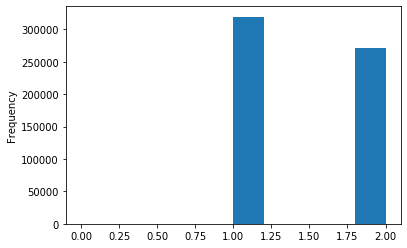

In [67]:
le_m_1 = preprocessing.LabelEncoder()
le_m_1.fit(df_train_transaction.M1.astype(str))
m_1 = le_m_1.classes_
m_1
df_train_transaction['m_1'] = le_m_1.transform(df_train_transaction['M1'].astype(str))
df_train_transaction.m_1.plot(kind='hist')

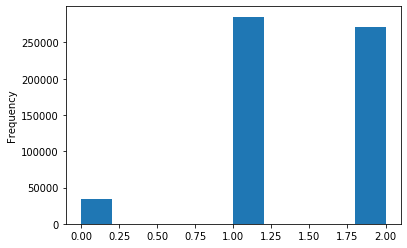

In [68]:
le_m_2 = preprocessing.LabelEncoder()
le_m_2.fit(df_train_transaction.M2.astype(str))
m_2 = le_m_2.classes_
m_2
df_train_transaction['m_2'] = le_m_2.transform(df_train_transaction['M2'].astype(str))
df_train_transaction.m_2.plot(kind='hist')

In [0]:
def encode_column(column):
  le = preprocessing.LabelEncoder()
  le.fit(column)
  print(le.classes_)
  return le.transform(column)

In [80]:
df_train_transaction['m_3'] = encode_column(df_train_transaction['M3'].astype(str))
df_train_transaction['m_4'] = encode_column(df_train_transaction['M4'].astype(str))
df_train_transaction['m_5'] = encode_column(df_train_transaction['M5'].astype(str))
df_train_transaction['m_6'] = encode_column(df_train_transaction['M6'].astype(str)) # we can encode all of these in one-shot because they are mostly just T/F values. 
df_train_transaction['m_7'] = encode_column(df_train_transaction['M7'].astype(str))
df_train_transaction['m_8'] = encode_column(df_train_transaction['M8'].astype(str))
df_train_transaction['m_9'] = encode_column(df_train_transaction['M9'].astype(str))


['F' 'T' 'nan']
['M0' 'M1' 'M2' 'nan']
['F' 'T' 'nan']
['F' 'T' 'nan']
['F' 'T' 'nan']
['F' 'T' 'nan']
['F' 'T' 'nan']


In [77]:
df_train_transaction[~df_train_transaction.M4.duplicated()].M4 

0     M2
1     M0
4    NaN
5     M1
Name: M4, dtype: object

In [0]:
cols_to_drop = ['isFraud', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6']

In [79]:
m.fit(df_train_transaction[0:100000].drop(cols_to_drop, axis=1), df_train_transaction.isFraud)

ValueError: ignored

In [0]:
cols_to_drop = ['isFraud', 'ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [82]:
m.fit(df_train_transaction[0:100000].drop(cols_to_drop, axis=1), df_train_transaction.isFraud)

ValueError: ignored

In [83]:
display_all(df_train_transaction.drop(cols_to_drop, axis=1).describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionID,590540,NaN,NaN,NaN,3.28227e+06,170474,2.987e+06,3.13463e+06,3.28227e+06,3.4299e+06,3.57754e+06
TransactionDT,590540,NaN,NaN,NaN,7.37231e+06,4.61722e+06,86400,3.02706e+06,7.30653e+06,1.12466e+07,1.58111e+07
TransactionAmt,590540,NaN,NaN,NaN,135.027,239.163,0.251,43.321,68.769,125,31937.4
card1,590540,NaN,NaN,NaN,9898.73,4901.17,1000,6019,9678,14184,18396
card2,581607,NaN,NaN,NaN,362.555,157.793,100,214,361,512,600
card3,588975,NaN,NaN,NaN,153.195,11.3364,100,150,150,150,231
card5,586281,NaN,NaN,NaN,199.279,41.2445,100,166,226,226,237
addr1,524834,NaN,NaN,NaN,290.734,101.741,100,204,299,330,540
addr2,524834,NaN,NaN,NaN,86.8006,2.69062,10,87,87,87,102
dist1,238269,NaN,NaN,NaN,118.502,371.872,0,3,8,24,10286


In [0]:
df_train_transaction = df_train_transaction.drop(['card_4'], axis=1)

In [89]:
m.fit(df_train_transaction[0:100000].drop(cols_to_drop, axis=1), df_train_transaction.isFraud)

ValueError: ignored

In [91]:
display_all(df_train_transaction.drop(cols_to_drop, axis=1).describe(include='all').transpose())

,count,mean,std,min,25%,50%,75%,max
TransactionID,590540.0,3.282270e+06,1.704744e+05,2987000.000,3.134635e+06,3.282270e+06,3.429904e+06,3.577539e+06
TransactionDT,590540.0,7.372311e+06,4.617224e+06,86400.000,3.027058e+06,7.306528e+06,1.124662e+07,1.581113e+07
TransactionAmt,590540.0,1.350272e+02,2.391625e+02,0.251,4.332100e+01,6.876900e+01,1.250000e+02,3.193739e+04
card1,590540.0,9.898735e+03,4.901170e+03,1000.000,6.019000e+03,9.678000e+03,1.418400e+04,1.839600e+04
card2,581607.0,3.625555e+02,1.577932e+02,100.000,2.140000e+02,3.610000e+02,5.120000e+02,6.000000e+02
card3,588975.0,1.531949e+02,1.133644e+01,100.000,1.500000e+02,1.500000e+02,1.500000e+02,2.310000e+02
card5,586281.0,1.992789e+02,4.124445e+01,100.000,1.660000e+02,2.260000e+02,2.260000e+02,2.370000e+02
addr1,524834.0,2.907338e+02,1.017411e+02,100.000,2.040000e+02,2.990000e+02,3.300000e+02,5.400000e+02
addr2,524834.0,8.680063e+01,2.690623e+00,10.000,8.700000e+01,8.700000e+01,8.700000e+01,1.020000e+02
dist1,238269.0,1.185022e+02,3.718720e+02,0.000,3.000000e+00,8.000000e+00,2.400000e+01,1.028600e+04


In [92]:
m.fit(df_train_transaction[0:100000].drop(cols_to_drop, axis=1).fillna(0), df_train_transaction.isFraud)

ValueError: ignored

In [95]:
m.fit(df_train_transaction[0:100000].drop(cols_to_drop, axis=1).fillna(0), df_train_transaction[0:100000].isFraud)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

In [0]:
??m.score

In [99]:
m.score(df_train_transaction[0:100000].drop(cols_to_drop, axis=1).fillna(0), df_train_transaction[0:100000].isFraud)

0.99722

In [0]:
# Split into X and Y
# Train and valid
# https://github.com/fastai/fastai/blob/master/courses/ml1/lesson1-rf.ipynb - proc_df